In [1]:
#Importing packages needed
import brightway2 as bw

import os               # to use "operating system dependent functionality"
import numpy as np      # "the fundamental package for scientific computing with Python"
import pandas as pd     # "high-performance, easy-to-use data structures and data analysis tools" for Python
from matplotlib import pyplot as plt #plotting graphs
from scipy import stats

In [2]:
#Setting up the project
bw.projects.set_current("LCAab20221") #setting the project created in anaconda 
bw.databases # printing the databases and previouly created projects contained in this environment e.g. biosphere3, ecoinvent, plasticblocks etc

Databases dictionary with 12 object(s):
	BeerB_DB
	DB_NAME
	Marker_DB
	Napkin_DB
	Plasticblocks_DB
	Pnap2_DB
	Pnap3_DB
	Pnap_DB
	Window_DB
	biosphere3
	ecoinvent 3.8 cutoff
	ecoinvent 3.8 cutoff edit

In [3]:
ei38 = bw.Database('ecoinvent 3.8 cutoff')
bio = bw.Database('biosphere3')

In [4]:
#Importing the created Excel Sheet 
imp = bw.ExcelImporter("plasticB.xlsx") 
imp.apply_strategies()
imp.match_database("ecoinvent 3.8 cutoff", fields=('name','unit','location'))
imp.match_database(fields=('name', 'unit', 'location'))
imp.statistics()

Extracted 1 worksheets in 0.02 seconds
Applying strategy: csv_restore_tuples
Applying strategy: csv_restore_booleans
Applying strategy: csv_numerize
Applying strategy: csv_drop_unknown
Applying strategy: csv_add_missing_exchanges_section
Applying strategy: normalize_units
Applying strategy: normalize_biosphere_categories
Applying strategy: normalize_biosphere_names
Applying strategy: strip_biosphere_exc_locations
Applying strategy: set_code_by_activity_hash
Applying strategy: link_iterable_by_fields
Applying strategy: assign_only_product_as_production
Applying strategy: link_technosphere_by_activity_hash
Applying strategy: drop_falsey_uncertainty_fields_but_keep_zeros
Applying strategy: convert_uncertainty_types_to_integers
Applying strategy: convert_activity_parameters_to_list
Applied 16 strategies in 19.18 seconds
Applying strategy: link_iterable_by_fields
Applying strategy: link_iterable_by_fields
4 datasets
18 exchanges
0 unlinked exchanges
  


(4, 18, 0)

In [5]:
# Writing the imported excel sheet as a database
imp.write_database()

mydb = bw.Database("Plasticblocks_DB")

Writing activities to SQLite3 database:
0% [####] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00


Title: Writing activities to SQLite3 database:
  Started: 12/12/2023 12:32:47
  Finished: 12/12/2023 12:32:47
  Total time elapsed: 00:00:00
  CPU %: 0.00
  Memory %: 1.24
Created database: Plasticblocks_DB


In [6]:
#writing the database
mydb

Brightway2 SQLiteBackend: Plasticblocks_DB

In [7]:
bw.databases

Databases dictionary with 12 object(s):
	BeerB_DB
	DB_NAME
	Marker_DB
	Napkin_DB
	Plasticblocks_DB
	Pnap2_DB
	Pnap3_DB
	Pnap_DB
	Window_DB
	biosphere3
	ecoinvent 3.8 cutoff
	ecoinvent 3.8 cutoff edit

In [8]:
#Creating a variable for the plasticblocks Database
Plasticblocks_DB = bw.Database("Plasticblocks_DB")

 LCA

In [9]:
# Extracting the activities for plastic blocks

plasticB_US_act1 = Plasticblocks_DB.get('Plasticblocks_RawMat_US')
plasticB_US_act2 = Plasticblocks_DB.get('Plasticblocks_prod_US')
plasticB_US_act3 = Plasticblocks_DB.get('Plasticblocks_Dist_US')
plasticB_US_act4 = Plasticblocks_DB.get('Plasticblocks_Use_US')


In [10]:
#Determine the methods and creainge variables for them 
methods= bw.methods

In [11]:
GWP = [m for m in methods if 'climate change' in str(m) 
       and 'GWP' in str(m)
       and 'ReCiPe Midpoint (E)' in str(m)
       and not 'obsolete' in str(m)
      ][0]
GWP

('ReCiPe Midpoint (E) V1.13 no LT', 'climate change', 'GWP500')

In [12]:
AP = [m for m in methods if 'acidification' in str(m) 
       and not 'obsolete' in str(m) 
       and 'ReCiPe Midpoint (E)' in str(m)
       and 'LT' in str(m)
          ][0]
AP

('ReCiPe Midpoint (E) V1.13 no LT', 'terrestrial acidification', 'TAP500')

In [13]:
FEP = [m for m in methods if 'eutrophication' in str(m) 
       and not 'obsolete' in str(m)
       and 'fresh' in str(m)
       and 'ReCiPe Midpoint (E)' in str(m)
          ][0]
FEP

('ReCiPe Midpoint (E) V1.13 no LT', 'freshwater eutrophication', 'FEP')

In [14]:
HT = [m for m in methods if 'human' in str(m) 
       and not 'obsolete' in str(m)
       and 'toxicity' in str(m)
       and 'ReCiPe Midpoint (E)' in str(m)
          ][0]
HT

('ReCiPe Midpoint (E) V1.13 no LT', 'human toxicity', 'HTPinf')

In [15]:
ET = [m for m in methods if 'ecotoxicity' in str(m) 
       and not 'obsolete' in str(m)
       and 'ReCiPe Midpoint (E)' in str(m)
          ][0]
ET

('ReCiPe Midpoint (E) V1.13 no LT', 'marine ecotoxicity', 'METPinf')

In [16]:
PMF = [m for m in methods if 'particulate' in str(m) 
       and not 'obsolete' in str(m)
       and 'matter' in str(m)
       and 'ReCiPe Midpoint (E)' in str(m)
          ][0]
PMF

('ReCiPe Midpoint (E) V1.13 no LT', 'particulate matter formation', 'PMFP')

In [18]:
#Setting up and running the calculation for a MultiLCA for plasticblocks
choosen_methods = [GWP,AP,FEP,HT,ET,PMF]
functional_units =[{plasticB_US_act1:1},{plasticB_US_act2:1},{plasticB_US_act3:1},{plasticB_US_act4:1}] 

In [19]:
bw.calculation_setups['comparison'] = {'inv': functional_units, 'ia': choosen_methods}

In [20]:
mlca = bw.MultiLCA('comparison')
mlca.results

array([[-5.99464461e+00,  1.38417729e-02,  5.71272251e-05,
        -7.13578457e+01, -1.45785978e+02, -2.25942916e-02],
       [ 5.30283578e+01,  2.23218602e-01,  3.28779562e-03,
         1.37261881e+02,  4.53734830e+01,  1.30498003e-01],
       [ 3.10386708e+00,  1.56580992e-02,  3.83386286e-05,
         1.16528780e+01,  8.30677273e+00,  7.26226173e-03],
       [ 9.52324187e+00,  2.43017367e-02,  1.20659488e-04,
         5.92218355e+00,  3.13464959e+00,  9.78695579e-03]])

In [21]:
#listing the activity names
activity_list = [plasticB_US_act1, plasticB_US_act2, plasticB_US_act3, plasticB_US_act4]
activity_list = [ x['name'] for x in activity_list ]
activity_list

['Plasticblocks_RawMat_US',
 'Plasticblocks_prod_US',
 'Plasticblocks_Dist_US',
 'Plasticblocks_Use_US']

In [22]:
#displaying the MultiLCA results as a DataFrame
df_results = pd.DataFrame(index=activity_list, columns=choosen_methods, data=mlca.results)
df_results

,"(ReCiPe Midpoint (E) V1.13 no LT, climate change, GWP500)","(ReCiPe Midpoint (E) V1.13 no LT, terrestrial acidification, TAP500)","(ReCiPe Midpoint (E) V1.13 no LT, freshwater eutrophication, FEP)","(ReCiPe Midpoint (E) V1.13 no LT, human toxicity, HTPinf)","(ReCiPe Midpoint (E) V1.13 no LT, marine ecotoxicity, METPinf)","(ReCiPe Midpoint (E) V1.13 no LT, particulate matter formation, PMFP)"
Plasticblocks_RawMat_US,-5.994645,0.013842,0.000057,-71.357846,-145.785978,-0.022594
Plasticblocks_prod_US,53.028358,0.223219,0.003288,137.261881,45.373483,0.130498
Plasticblocks_Dist_US,3.103867,0.015658,0.000038,11.652878,8.306773,0.007262
Plasticblocks_Use_US,9.523242,0.024302,0.000121,5.922184,3.134650,0.009787


# Contributional Analysis

In [23]:
#importing
from bw2analyzer import ContributionAnalysis

In [24]:
#Then we run the Contribution Analysis tool to get the top processes and their contribution to the activity/method
methods = [GWP,AP,FEP,HT,ET,PMF]
string_methods = ['GWP','AP','FEP','HT','ET','PMF']

LCA_Plasticblocks_RawMat_US = []
LCA_Plasticblocks_prod_US = []
LCA_Plasticblocks_Dist_US = []
LCA_Plasticblocks_Use_US = []

Plasticblocks_RawMat_US = Plasticblocks_DB.get('Plasticblocks_RawMat_US')
Plasticblocks_prod_US = Plasticblocks_DB.get('Plasticblocks_prod_US')
Plasticblocks_Dist_US = Plasticblocks_DB.get('Plasticblocks_Dist_US')
Plasticblocks_Use_US = Plasticblocks_DB.get('Plasticblocks_Use_US')


In [25]:
#Individual Contribution Analysis
for i in methods:
    Plasticblocks_RawMat_US_lca = bw.LCA({Plasticblocks_RawMat_US:1}, i)
    Plasticblocks_RawMat_US_lca.lci()
    Plasticblocks_RawMat_US_lca.lcia()
    LCA_Plasticblocks_RawMat_US.append(Plasticblocks_RawMat_US_lca.score)

    ContributionAnalysis().annotated_top_processes(Plasticblocks_RawMat_US_lca, limit=10)

print(LCA_Plasticblocks_RawMat_US)

[-5.994644614556571, 0.013841772911558548, 5.712722513105022e-05, -71.3578456562899, -145.78597791741626, -0.022594291554219104]


In [26]:
results_by_activity = (Plasticblocks_RawMat_US_lca.characterized_inventory.sum(axis=0)).A1
Plasticblocks_RawMat_US_lca_rev_act_dict, Plasticblocks_RawMat_US_lca_rev_product_dict, Plasticblocks_RawMat_US_lca_rev_bio_dict = Plasticblocks_RawMat_US_lca.reverse_dict()
list_of_names_in_columns = [bw.get_activity(Plasticblocks_RawMat_US_lca_rev_act_dict[col])['name'] 
                            for col in range(Plasticblocks_RawMat_US_lca.characterized_inventory.shape[1])]
pd.Series(index=list_of_names_in_columns, data=results_by_activity).sort_values(ascending=False).head(5)

transport, freight, lorry >32 metric ton, EURO3      0.001186
transport, freight, lorry 16-32 metric ton, EURO3    0.001075
diesel, burned in building machine                   0.001031
road construction                                    0.001007
treatment of brake wear emissions, lorry             0.000532
dtype: float64

In [27]:
for i in methods:
    Plasticblocks_prod_US_lca = bw.LCA({Plasticblocks_prod_US:1}, i)
    Plasticblocks_prod_US_lca.lci()
    Plasticblocks_prod_US_lca.lcia()
    LCA_Plasticblocks_prod_US.append(Plasticblocks_prod_US_lca.score)

    ContributionAnalysis().annotated_top_processes(Plasticblocks_prod_US_lca, limit=10)

print(LCA_Plasticblocks_prod_US)

[53.028357759710204, 0.22321860227796125, 0.003287795622973479, 137.26188087343462, 45.37348304162709, 0.13049800303693443]


In [28]:
results_by_activity = (Plasticblocks_prod_US_lca.characterized_inventory.sum(axis=0)).A1
Plasticblocks_prod_US_lca_rev_act_dict, Plasticblocks_prod_US_lca_rev_product_dict, Plasticblocks_prod_US_lca_rev_bio_dict = Plasticblocks_prod_US_lca.reverse_dict()
list_of_names_in_columns = [bw.get_activity(Plasticblocks_prod_US_lca_rev_act_dict[col])['name'] 
                            for col in range(Plasticblocks_prod_US_lca.characterized_inventory.shape[1])]
pd.Series(index=list_of_names_in_columns, data=results_by_activity).sort_values(ascending=False).head(5)

electricity production, lignite    0.012043
electricity production, lignite    0.007252
electricity production, lignite    0.006071
electricity production, lignite    0.006000
electricity production, lignite    0.005405
dtype: float64

In [29]:
for i in methods:
    Plasticblocks_Dist_US_lca = bw.LCA({Plasticblocks_Dist_US:1}, i)
    Plasticblocks_Dist_US_lca.lci()
    Plasticblocks_Dist_US_lca.lcia()
    LCA_Plasticblocks_Dist_US.append(Plasticblocks_Dist_US_lca.score)

    ContributionAnalysis().annotated_top_processes(Plasticblocks_Dist_US_lca, limit=10)

print(LCA_Plasticblocks_Dist_US)

[3.103867076953051, 0.015658099165298103, 3.833862856718541e-05, 11.65287797614005, 8.306772726287818, 0.007262261729747119]


In [30]:
results_by_activity = (Plasticblocks_Dist_US_lca.characterized_inventory.sum(axis=0)).A1
Plasticblocks_Dist_US_lca_rev_act_dict, Plasticblocks_Dist_lca_rev_product_dict, Plasticblocks_Dist_US_lca_rev_bio_dict = Plasticblocks_Dist_US_lca.reverse_dict()
list_of_names_in_columns = [bw.get_activity(Plasticblocks_Dist_US_lca_rev_act_dict[col])['name'] 
                            for col in range(Plasticblocks_Dist_US_lca.characterized_inventory.shape[1])]
pd.Series(index=list_of_names_in_columns, data=results_by_activity).sort_values(ascending=False).head(5)

road construction                                    0.000637
transport, freight, lorry >32 metric ton, EURO3      0.000585
transport, freight, lorry 16-32 metric ton, EURO3    0.000530
diesel, burned in building machine                   0.000402
treatment of brake wear emissions, lorry             0.000326
dtype: float64

In [31]:
for i in methods:
    Plasticblocks_Use_US_lca = bw.LCA({Plasticblocks_Use_US:1}, i)
    Plasticblocks_Use_US_lca.lci()
    Plasticblocks_Use_US_lca.lcia()
    LCA_Plasticblocks_Use_US.append(Plasticblocks_Use_US_lca.score)

    ContributionAnalysis().annotated_top_processes(Plasticblocks_Use_US_lca, limit=10)

print(LCA_Plasticblocks_Use_US)

[9.523241874312637, 0.024301736737325802, 0.00012065948834815588, 5.922183550154326, 3.1346495921027704, 0.009786955793940262]


In [32]:
results_by_activity = (Plasticblocks_Use_US_lca.characterized_inventory.sum(axis=0)).A1
Plasticblocks_Use_US_lca_rev_act_dict, Plasticblocks_Use_lca_rev_product_dict, Plasticblocks_Use_US_lca_rev_bio_dict = Plasticblocks_Use_US_lca.reverse_dict()
list_of_names_in_columns = [bw.get_activity(Plasticblocks_Use_US_lca_rev_act_dict[col])['name'] 
                            for col in range(Plasticblocks_Use_US_lca.characterized_inventory.shape[1])]
pd.Series(index=list_of_names_in_columns, data=results_by_activity).sort_values(ascending=False).head(5)

clinker production                                             0.004306
electricity production, hard coal, at coal mine power plant    0.000474
limestone quarry operation                                     0.000421
electricity production, hard coal                              0.000278
limestone quarry operation                                     0.000229
dtype: float64

# Monte Carlo Simulation

In [33]:
#Monte Carlo Simulation - helps us do an uncertainty analysis by simulating LCA across many iterations
demand2 = [{plasticB_US_act1:1},{plasticB_US_act2:1},{plasticB_US_act3:1},{plasticB_US_act4:1}]
choosen_methods

[('ReCiPe Midpoint (E) V1.13 no LT', 'climate change', 'GWP500'),
 ('ReCiPe Midpoint (E) V1.13 no LT', 'terrestrial acidification', 'TAP500'),
 ('ReCiPe Midpoint (E) V1.13 no LT', 'freshwater eutrophication', 'FEP'),
 ('ReCiPe Midpoint (E) V1.13 no LT', 'human toxicity', 'HTPinf'),
 ('ReCiPe Midpoint (E) V1.13 no LT', 'marine ecotoxicity', 'METPinf'),
 ('ReCiPe Midpoint (E) V1.13 no LT', 'particulate matter formation', 'PMFP')]

In [34]:
#Function for Monte Carlo simulation. Input parameters are: activity (your desired activity), amount (the inventory amount of your activity),
# impact_category (your desired impact category), iterations (# of times to run simulation), column_header (header name for your activity (string))
mc = bw.MonteCarloLCA(demand2[0], GWP)
iterations = 20
simulations = []

for _ in range(iterations):
    next(mc)
    mcresults= []    
    for i in demand2:
        mc.redo_lcia(i)
        mcresults.append(mc.score)
    simulations.append(mcresults)
    
df_GWP2 = pd.DataFrame(simulations, columns =['Plasticblocks_RawMat_US','Plasticblocks_prod_US','Plasticblocks_Dist_US','Plasticblocks_Use_US'])

df_GWP2                                               

,Plasticblocks_RawMat_US,Plasticblocks_prod_US,Plasticblocks_Dist_US,Plasticblocks_Use_US
0,-5.695929,57.256717,3.365435,8.202542
1,-5.634386,52.615453,3.331024,11.377623
2,-4.182099,49.718131,3.413106,9.551802
3,-6.097440,60.016134,3.433399,9.328591
4,-5.091149,63.648497,3.508947,14.452759
5,-5.046224,60.908697,3.649710,10.720363
6,-6.249966,61.956478,3.459290,10.975079
7,-5.440375,64.626807,3.377605,6.943206
8,-6.337077,53.672888,3.249839,8.473553
9,-5.296469,63.743700,3.385507,8.035087


In [35]:
mc = bw.MonteCarloLCA(demand2[0], AP)
iterations = 20
simulations = []

for _ in range(iterations):
    next(mc)
    mcresults= []    
    for i in demand2:
        mc.redo_lcia(i)
        mcresults.append(mc.score)
    simulations.append(mcresults)
    
df_AP = pd.DataFrame(simulations, columns =['Plasticblocks_RawMat_US','Plasticblocks_prod_US','Plasticblocks_Dist_US','Plasticblocks_Use_US'])

df_AP 
    

,Plasticblocks_RawMat_US,Plasticblocks_prod_US,Plasticblocks_Dist_US,Plasticblocks_Use_US
0,0.016961,0.230362,0.018408,0.023313
1,0.021707,0.260711,0.016516,0.032434
2,0.025401,0.372446,0.019825,0.027757
3,0.009248,0.280698,0.023198,0.024949
4,0.021867,0.288113,0.018583,0.023161
5,0.007208,0.247748,0.017543,0.028958
6,0.020557,0.243529,0.017259,0.022116
7,-0.005516,0.235928,0.019658,0.025293
8,-0.023829,0.264325,0.018459,0.022156
9,0.023828,0.261500,0.016032,0.029676


In [36]:
mc = bw.MonteCarloLCA(demand2[0], FEP)
iterations = 20
simulations = []

for _ in range(iterations):
    next(mc)
    mcresults= []    
    for i in demand2:
        mc.redo_lcia(i)
        mcresults.append(mc.score)
    simulations.append(mcresults)
    
df_FEP = pd.DataFrame(simulations, columns =['Plasticblocks_RawMat_US','Plasticblocks_prod_US','Plasticblocks_Dist_US','Plasticblocks_Use_US'])

df_FEP

,Plasticblocks_RawMat_US,Plasticblocks_prod_US,Plasticblocks_Dist_US,Plasticblocks_Use_US
0,0.000374,0.011884,0.000205,0.000583
1,0.000121,0.005587,0.000071,0.000271
2,0.000171,0.013209,0.000099,0.000275
3,0.000145,0.006424,0.000096,0.000263
4,0.000048,0.002149,0.000038,0.000085
5,0.000120,0.003661,0.000070,0.000197
6,0.000056,0.002277,0.000035,0.000061
7,0.000069,0.003611,0.000053,0.000110
8,0.000057,0.001906,0.000040,0.000117
9,0.000100,0.004278,0.000058,0.000169


In [37]:
mc = bw.MonteCarloLCA(demand2[0], HT)
iterations = 20
simulations = []

for _ in range(iterations):
    next(mc)
    mcresults= []    
    for i in demand2:
        mc.redo_lcia(i)
        mcresults.append(mc.score)
    simulations.append(mcresults)
    
df_HT = pd.DataFrame(simulations, columns =['Plasticblocks_RawMat_US','Plasticblocks_prod_US','Plasticblocks_Dist_US','Plasticblocks_Use_US'])

df_HT

,Plasticblocks_RawMat_US,Plasticblocks_prod_US,Plasticblocks_Dist_US,Plasticblocks_Use_US
0,-81.413941,329.772932,11.770118,20.773026
1,-65.621751,416.728626,21.251988,20.475446
2,-103.571466,295.869139,19.636735,14.642397
3,-126.672704,202.260585,16.279599,3.782940
4,-2.222465,421.329679,29.755626,34.855441
5,-754.203522,195.727118,2.209213,10.745712
6,-178.054655,219.723491,6.816902,9.536245
7,-84.569577,263.245179,12.729348,5.119062
8,-83.197539,160.287076,12.222104,11.548126
9,-81.688715,283.736806,30.130769,20.098416


In [38]:
mc = bw.MonteCarloLCA(demand2[0], ET)
iterations = 20
simulations = []

for _ in range(iterations):
    next(mc)
    mcresults= []    
    for i in demand2:
        mc.redo_lcia(i)
        mcresults.append(mc.score)
    simulations.append(mcresults)
    
df_ET = pd.DataFrame(simulations, columns =['Plasticblocks_RawMat_US','Plasticblocks_prod_US','Plasticblocks_Dist_US','Plasticblocks_Use_US'])

df_ET

,Plasticblocks_RawMat_US,Plasticblocks_prod_US,Plasticblocks_Dist_US,Plasticblocks_Use_US
0,-138.863520,80.107713,11.772209,6.778481
1,-186.858582,55.838368,8.051291,4.945264
2,-222.238641,70.657017,9.303362,4.763831
3,-209.674816,86.472752,8.360422,3.854337
4,-320.383777,57.911652,7.710917,5.384555
5,-136.147015,146.570353,8.521310,6.099378
6,-245.927508,67.242464,10.322705,3.805447
7,-203.765276,72.165728,10.511607,4.961277
8,-120.288755,53.960002,8.679426,5.093913
9,-179.503277,123.682955,9.759366,4.883948


In [39]:
mc = bw.MonteCarloLCA(demand2[0], PMF)
iterations = 20
simulations = []

for _ in range(iterations):
    next(mc)
    mcresults= []    
    for i in demand2:
        mc.redo_lcia(i)
        mcresults.append(mc.score)
    simulations.append(mcresults)
    
df_PMF = pd.DataFrame(simulations, columns =['Plasticblocks_RawMat_US','Plasticblocks_prod_US','Plasticblocks_Dist_US','Plasticblocks_Use_US'])
df_PMF

,Plasticblocks_RawMat_US,Plasticblocks_prod_US,Plasticblocks_Dist_US,Plasticblocks_Use_US
0,-0.029374,0.130116,0.008611,0.012459
1,-0.032356,0.126793,0.007683,0.011659
2,-0.012802,0.162626,0.008054,0.010796
3,-0.029090,0.145410,0.009447,0.012654
4,-0.000605,0.117900,0.008870,0.012948
5,-0.033127,0.155380,0.008199,0.011563
6,-0.034835,0.132972,0.007524,0.010801
7,-0.045796,0.159582,0.008326,0.018111
8,-0.044316,0.166274,0.010368,0.010380
9,-0.026015,0.142099,0.009358,0.010840


# Visualization of Results (Table, Box Plot)

In [40]:
# GWP
df_GWP2.describe()

,Plasticblocks_RawMat_US,Plasticblocks_prod_US,Plasticblocks_Dist_US,Plasticblocks_Use_US
count,20.000000,20.000000,20.000000,20.000000
mean,-5.502190,58.074810,3.448274,9.811576
std,0.835660,5.615246,0.158644,1.650405
min,-6.851830,47.702819,3.040681,6.943206
25%,-6.135572,53.678467,3.374563,8.707551
50%,-5.537380,58.544861,3.446012,9.971847
75%,-5.077371,62.379482,3.519053,10.654879
max,-3.987185,67.969586,3.747341,14.452759


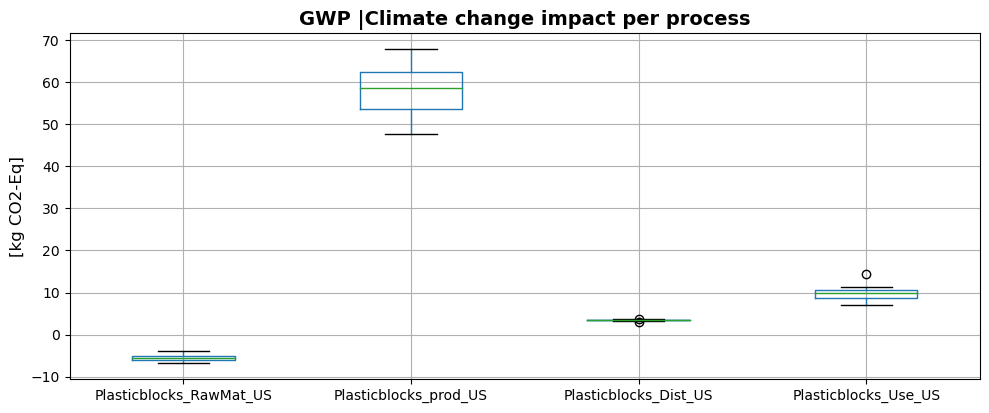

In [41]:
from matplotlib import pyplot as plt

# GWP
boxplot = df_GWP2.boxplot(figsize=(10,4), fontsize=10)                                     ## print(plt.style.available)
plt.ylabel('[kg CO2-Eq]', fontsize=12)
plt.tight_layout()
plt.title('GWP |Climate change impact per process',fontsize=14, fontweight='bold')
plt.savefig('boxplot-GWP-day2.png')
plt.show()

In [42]:
# AP
df_AP.describe()

,Plasticblocks_RawMat_US,Plasticblocks_prod_US,Plasticblocks_Dist_US,Plasticblocks_Use_US
count,20.000000,20.000000,20.000000,20.000000
mean,0.011634,0.262498,0.017851,0.026094
std,0.012946,0.032374,0.001672,0.004119
min,-0.023829,0.230362,0.015930,0.018448
25%,0.004016,0.238180,0.016552,0.023275
50%,0.015670,0.260397,0.017646,0.025267
75%,0.021419,0.279898,0.018421,0.028660
max,0.025401,0.372446,0.023198,0.036270


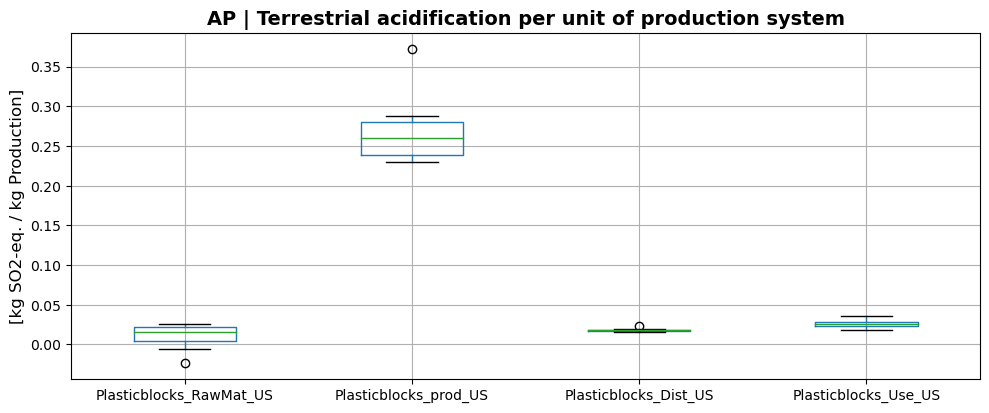

In [43]:
# AP
boxplot = df_AP.boxplot(figsize=(10,4), fontsize=10)                                     ## print(plt.style.available)
plt.ylabel('[kg SO2-eq. / kg Production]', fontsize=12)
plt.tight_layout()
plt.title('AP | Terrestrial acidification per unit of production system',fontsize=14, fontweight='bold')
plt.savefig('boxplot-AP-day2.png')
plt.show()

In [44]:
# FEP
df_FEP.describe()

,Plasticblocks_RawMat_US,Plasticblocks_prod_US,Plasticblocks_Dist_US,Plasticblocks_Use_US
count,20.000000,20.000000,20.000000,20.000000
mean,0.000105,0.005190,0.000064,0.000180
std,0.000072,0.003307,0.000038,0.000117
min,0.000030,0.001410,0.000023,0.000056
25%,0.000061,0.002693,0.000042,0.000110
50%,0.000093,0.004613,0.000058,0.000156
75%,0.000120,0.006290,0.000067,0.000216
max,0.000374,0.013209,0.000205,0.000583


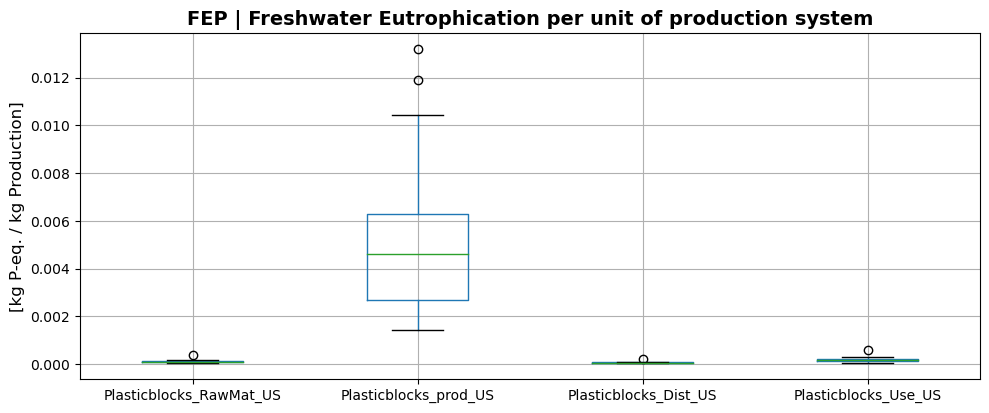

In [45]:
# FEP
boxplot = df_FEP.boxplot(figsize=(10,4), fontsize=10)                                     ## print(plt.style.available)
plt.ylabel('[kg P-eq. / kg Production]', fontsize=12)
plt.tight_layout()
plt.title('FEP | Freshwater Eutrophication per unit of production system',fontsize=14, fontweight='bold')
plt.savefig('boxplot-FEP-day2.png')
plt.show()

In [46]:
# HT
df_HT.describe()

,Plasticblocks_RawMat_US,Plasticblocks_prod_US,Plasticblocks_Dist_US,Plasticblocks_Use_US
count,20.000000,20.000000,20.000000,20.000000
mean,-138.912031,264.655500,16.594308,14.359041
std,156.328905,100.110249,10.174349,7.619824
min,-754.203522,62.360719,2.209213,3.782940
25%,-122.725623,200.627219,10.053726,9.019882
50%,-85.491742,254.340384,14.521606,11.815790
75%,-81.620021,323.411682,20.040548,20.192674
max,-2.222465,427.650735,37.392505,34.855441


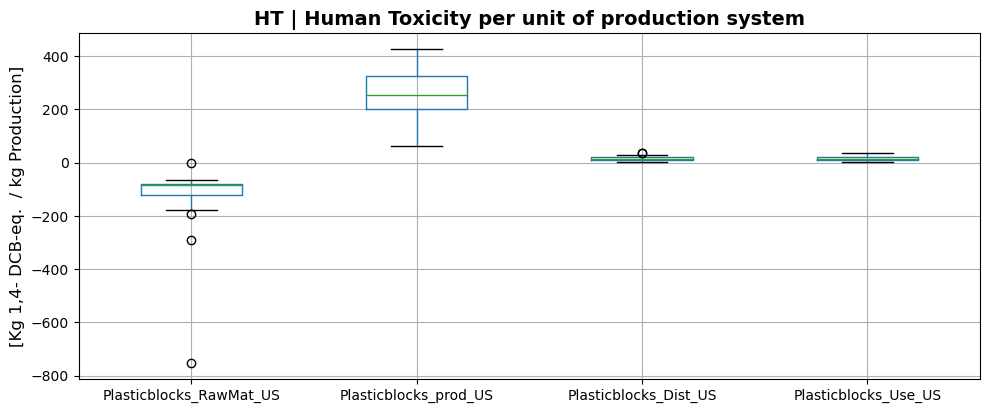

In [47]:
# HT
boxplot = df_HT.boxplot(figsize=(10,4), fontsize=10)                                     ## print(plt.style.available)
plt.ylabel('[Kg 1,4- DCB-eq.  / kg Production]', fontsize=12)
plt.tight_layout()
plt.title('HT | Human Toxicity per unit of production system',fontsize=14, fontweight='bold')
plt.savefig('boxplot-HT-day2.png')
plt.show()

In [48]:
# ET
df_ET.describe()

,Plasticblocks_RawMat_US,Plasticblocks_prod_US,Plasticblocks_Dist_US,Plasticblocks_Use_US
count,20.000000,20.000000,20.000000,20.000000
mean,-191.395094,80.410824,9.956739,5.101141
std,70.471214,23.608324,1.637318,0.773333
min,-368.024810,53.960002,7.223053,3.805447
25%,-212.815773,66.524422,8.619764,4.741083
50%,-183.180929,72.001853,10.000673,4.953271
75%,-138.184393,86.718275,11.241188,5.404785
max,-98.298523,146.570353,13.503420,6.778481


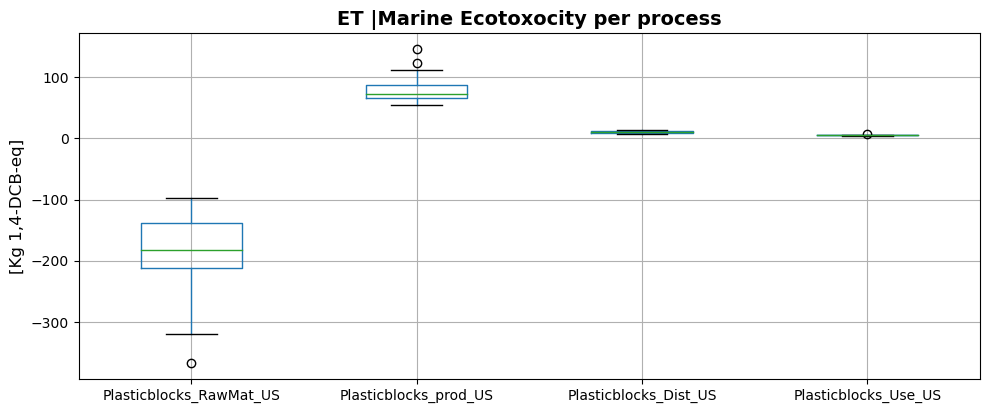

In [49]:
# ET
boxplot = df_ET.boxplot(figsize=(10,4), fontsize=10)                                     ## print(plt.style.available)
plt.ylabel('[Kg 1,4-DCB-eq]', fontsize=12)
plt.tight_layout()
plt.title('ET |Marine Ecotoxocity per process',fontsize=14, fontweight='bold')
plt.savefig('boxplot-ET-day2.png')
plt.show()

In [50]:
# PMF
df_PMF.describe()

,Plasticblocks_RawMat_US,Plasticblocks_prod_US,Plasticblocks_Dist_US,Plasticblocks_Use_US
count,20.000000,20.000000,20.000000,20.000000
mean,-0.028015,0.150145,0.008499,0.011633
std,0.016860,0.020163,0.000764,0.002108
min,-0.062870,0.117900,0.007493,0.009045
25%,-0.035527,0.130166,0.008010,0.010692
50%,-0.029232,0.150395,0.008289,0.011339
75%,-0.014084,0.167084,0.008824,0.012515
max,-0.000605,0.187372,0.010368,0.018111


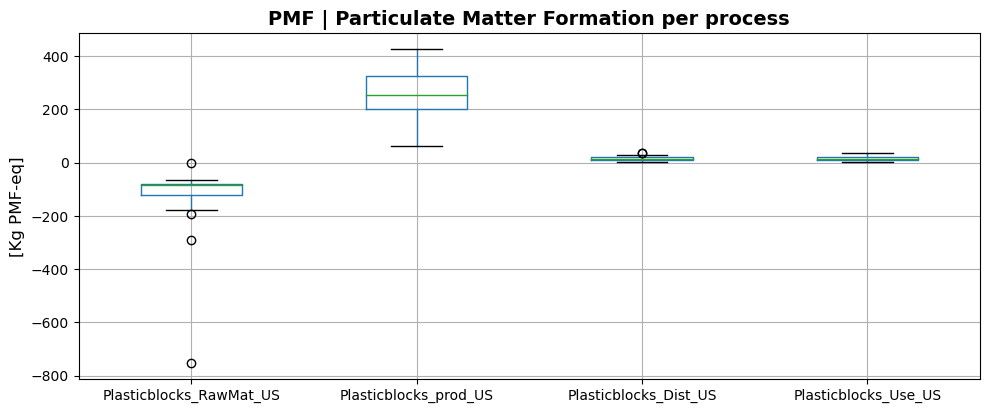

In [51]:
# PMF
boxplot = df_HT.boxplot(figsize=(10,4), fontsize=10)                                     ## print(plt.style.available)
plt.ylabel('[Kg PMF-eq]', fontsize=12)
plt.tight_layout()
plt.title('PMF | Particulate Matter Formation per process',fontsize=14, fontweight='bold')
plt.savefig('boxplot-PMF-day2.png')
plt.show()